<a href="https://colab.research.google.com/github/saivaishnav21/LabAssign2/blob/main/labassign2_bl_en_u4aie23120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following activities. • What is the dimensionality of the vector space for this data? • How many vectors exist in this vector space? • What is the rank of Matrix A? • Using Pseudo-Inverse find the cost of each product available for sale.
(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a pseudo-inverse.)

In [ ]:
import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/Lab2ML/Lab_Session_Data.xlsx'
purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')

purchase_data = purchase_data.loc[:, ~purchase_data.columns.str.contains('^Unnamed')]

A = purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values

C = purchase_data['Payment (Rs)'].values

print("Matrix A (Product Quantities):")
print(A)
print("Vector C (Total Payment):")
print(C)


dimensionality = A.shape[1]
print(f"Dimensionality of the vector space: {dimensionality}")


num_vectors = A.shape[0]
print(f"Number of vectors in the vector space: {num_vectors}")

rank_A = np.linalg.matrix_rank(A)
print(f"Rank of Matrix A: {rank_A}")


A_pseudo_inv = np.linalg.pinv(A)

X = np.dot(A_pseudo_inv, C)

print("Cost of each product:")
print(f"Candy Price: Rs {X[0]:.2f}")
print(f"Mango Price per Kg: Rs {X[1]:.2f}")
print(f"Milk Packet Price: Rs {X[2]:.2f}")



Matrix A (Product Quantities):
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Vector C (Total Payment):
[386 289 393 110 280 167 271 274 148 198]
Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product:
Candy Price: Rs 1.00
Mango Price per Kg: Rs 55.00
Milk Packet Price: Rs 18.00


2) Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.

In [ ]:
print("Cost of each product (Model Vector X):")
print(X)
c_predicted = np.dot(A, X)
print("\nActual Costs (C):", C)
print("Predicted Costs (C_predicted):", c_predicted)

Cost of each product (Model Vector X):
[ 1. 55. 18.]

Actual Costs (C): [386 289 393 110 280 167 271 274 148 198]
Predicted Costs (C_predicted): [386. 289. 393. 110. 280. 167. 271. 274. 148. 198.]


3) Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

purchase_data['Class'] = purchase_data['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

numeric_features = purchase_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Payment (Rs)'])
X = numeric_features.fillna(numeric_features.median())
y = purchase_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

joblib.dump(model, 'customer_classifier.pkl')

Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Confusion Matrix:
[[1 0]
 [1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['customer_classifier.pkl']

4) Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform. • Calculate the mean and variance of the Price data present in column D.
(Suggestion: if you use Python, you may use statistics.mean() & statistics.variance() methods). • Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations. • Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations. • From the Chg% (available in column I) find the probability of making a loss over the stock. (Suggestion: use lambda function to find negative values) • Calculate the probability of making a profit on Wednesday. • Calculate the conditional probability of making profit, given that today is Wednesday. • Make a scatter plot of Chg% data against the day of the week

Mean of Price data: 1560.663453815261
Variance of Price data: 58732.365352539186

Sample mean for Wednesdays: 1550.706
Population mean: 1560.663453815261
Difference: -9.957453815261033

Sample mean for April: 1698.9526315789474
Population mean: 1560.663453815261
Difference: 138.28917776368644

Probability of making a loss: 0.4979919678714859

Probability of making a profit on Wednesday: 0.42

Conditional probability of making a profit given that today is Wednesday: 0.42


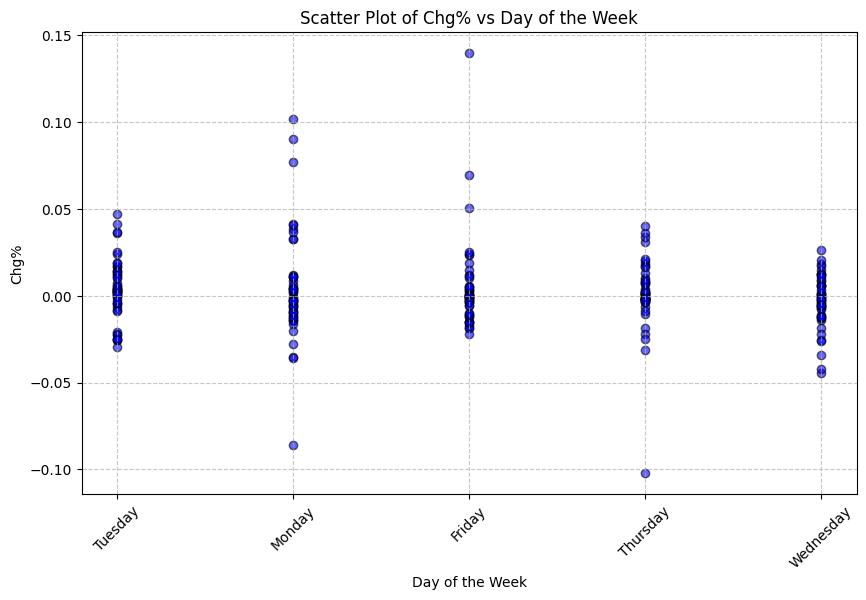

In [ ]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np

irctc_data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
irctc_data['Date'] = pd.to_datetime(irctc_data['Date'])

price_data = irctc_data['Price']

mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

print("Mean of Price data:", mean_price)
print("Variance of Price data:", variance_price)

wednesday_data = irctc_data[irctc_data['Date'].dt.day_name() == 'Wednesday']

if not wednesday_data.empty:
    wednesday_mean = statistics.mean(wednesday_data['Price'])
    print("\nSample mean for Wednesdays:", wednesday_mean)
    print("Population mean:", mean_price)
    print("Difference:", wednesday_mean - mean_price)
else:
    print("\nNo Wednesday data available.")

april_data = irctc_data[irctc_data['Date'].dt.month == 4]

if not april_data.empty:
    april_mean = statistics.mean(april_data['Price'])
    print("\nSample mean for April:", april_mean)
    print("Population mean:", mean_price)
    print("Difference:", april_mean - mean_price)
else:
    print("\nNo April data available.")

chg_data = irctc_data['Chg%']

probability_loss = np.mean(chg_data < 0)
print("\nProbability of making a loss:", probability_loss)

wednesday_chg_data = wednesday_data['Chg%']

if not wednesday_chg_data.empty:
    probability_profit_wednesday = np.mean(wednesday_chg_data > 0)
    print("\nProbability of making a profit on Wednesday:", probability_profit_wednesday)

    profit_wednesdays = len(wednesday_chg_data[wednesday_chg_data > 0])
    conditional_probability = profit_wednesdays / len(wednesday_chg_data)

    print("\nConditional probability of making a profit given that today is Wednesday:", conditional_probability)
else:
    print("\nNo Wednesday change data available.")

irctc_data['Day'] = irctc_data['Date'].dt.day_name()

plt.figure(figsize=(10, 6))
plt.scatter(irctc_data['Day'], irctc_data['Chg%'], alpha=0.6, c='blue', edgecolors='black')
plt.title('Scatter Plot of Chg% vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Q5-Q10

Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

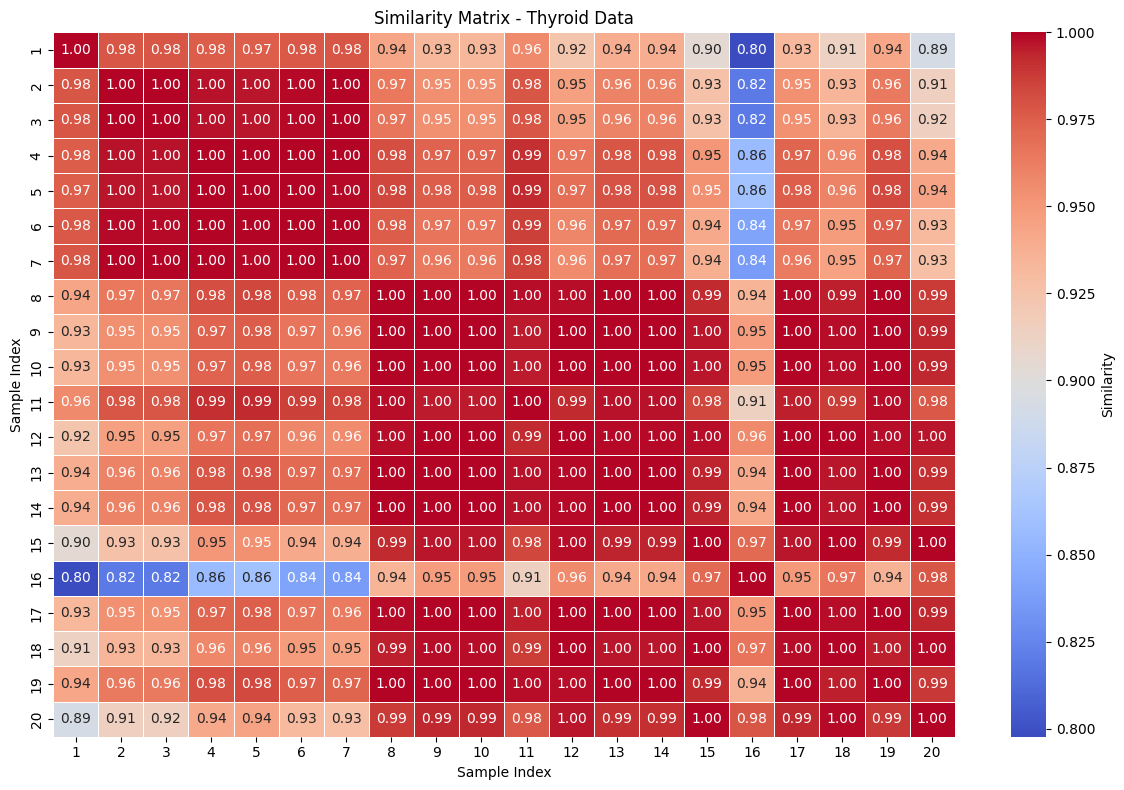

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Lab2ML/Lab_Session_Data.xlsx"
thyroid_df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

num_cols = thyroid_df.select_dtypes(include=[np.number]).columns
cat_cols = thyroid_df.select_dtypes(exclude=[np.number]).columns

print("Data Types:\n", thyroid_df.dtypes)
print("\nStatistical Summary:\n", thyroid_df.describe())

thyroid_df[num_cols] = thyroid_df[num_cols].apply(
    lambda col: col.fillna(col.median() if ((col - col.mean()).abs() > 3 * col.std()).sum() > 0 else col.mean())
)

thyroid_df[cat_cols] = thyroid_df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

print("\nNull Values Count After Cleaning:\n", thyroid_df.isnull().sum())

scaler = MinMaxScaler()
thyroid_df[num_cols] = scaler.fit_transform(thyroid_df[num_cols])

print("\nFirst 5 Rows of Data:\n", thyroid_df.head())

vec1_bool = thyroid_df.iloc[0, :].astype(bool)
vec2_bool = thyroid_df.iloc[1, :].astype(bool)

f11 = sum(vec1_bool & vec2_bool)
f00 = sum(~vec1_bool & ~vec2_bool)
f01 = sum(~vec1_bool & vec2_bool)
f10 = sum(vec1_bool & ~vec2_bool)

jaccard_sim = f11 / (f01 + f10 + f11)
smc_sim = (f11 + f00) / (f00 + f01 + f10 + f11)

print(f"\nJaccard Similarity: {jaccard_sim:.4f}")
print(f"Simple Matching Coefficient: {smc_sim:.4f}")

vec1_num = thyroid_df.loc[0, num_cols].values.astype(np.float64)
vec2_num = thyroid_df.loc[1, num_cols].values.astype(np.float64)

cosine_sim = np.dot(vec1_num, vec2_num) / (np.linalg.norm(vec1_num) * np.linalg.norm(vec2_num))
print(f"Cosine Similarity: {cosine_sim:.4f}")

sim_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        v1_bool = thyroid_df.iloc[i, :].astype(bool)
        v2_bool = thyroid_df.iloc[j, :].astype(bool)

        f11 = sum(v1_bool & v2_bool)
        f00 = sum(~v1_bool & ~v2_bool)
        f01 = sum(~v1_bool & v2_bool)
        f10 = sum(v1_bool & ~v2_bool)

        jc_sim = f11 / (f01 + f10 + f11)
        smc_sim = (f11 + f00) / (f00 + f01 + f10 + f11)

        v1_num = thyroid_df.loc[i, num_cols].values.astype(np.float64)
        v2_num = thyroid_df.loc[j, num_cols].values.astype(np.float64)
        cos_sim = np.dot(v1_num, v2_num) / (np.linalg.norm(v1_num) * np.linalg.norm(v2_num))

        sim_matrix[i, j] = (jc_sim + smc_sim + cos_sim) / 3

plt.figure(figsize=(12, 8))
sns.heatmap(
    sim_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar_kws={'label': 'Similarity'},
    xticklabels=range(1, 21),
    yticklabels=range(1, 21),
    linewidths=0.5,
)

plt.title('Similarity Matrix - Thyroid Data')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')

plt.tight_layout()
plt.show()
